In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,
                           random_state=41,hypercube=False,class_sep=20)

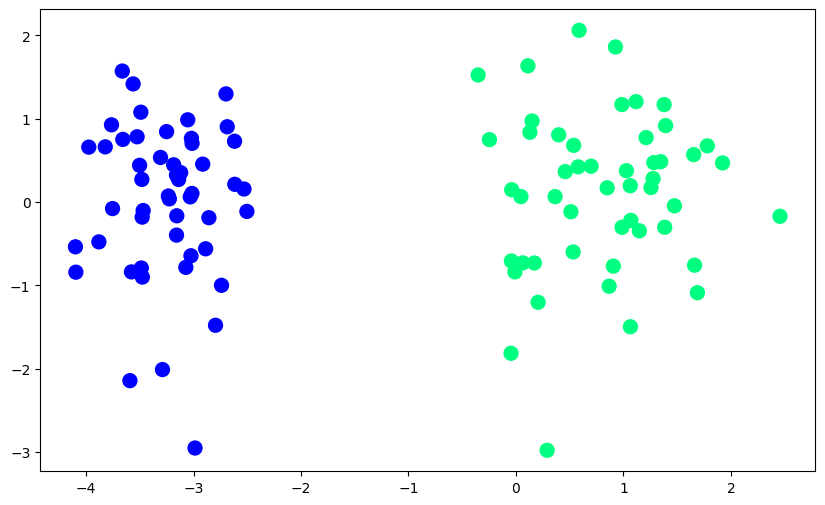

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.show()

# Code from scratch

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [6]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    W = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],W))
        W = W + lr*(y[j]-y_hat)*X[j]

    return (W[0],W[1:]) 

In [7]:
intercept_,coef_ = perceptron(X,y)

In [8]:
print(intercept_,coef_)

2.847244018191801 [2.85551022 0.04386709]


In [9]:
def plot(X,y,m,c,color='r'):
    plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
    newX = np.linspace(-3,3,100)
    newY = m*newX + c
    plt.plot(newX,newY,color=color,linewidth=3)
    plt.ylim(-3,2)

In [10]:
m = -(coef_[0]/coef_[1])
c = -(intercept_/coef_[1])

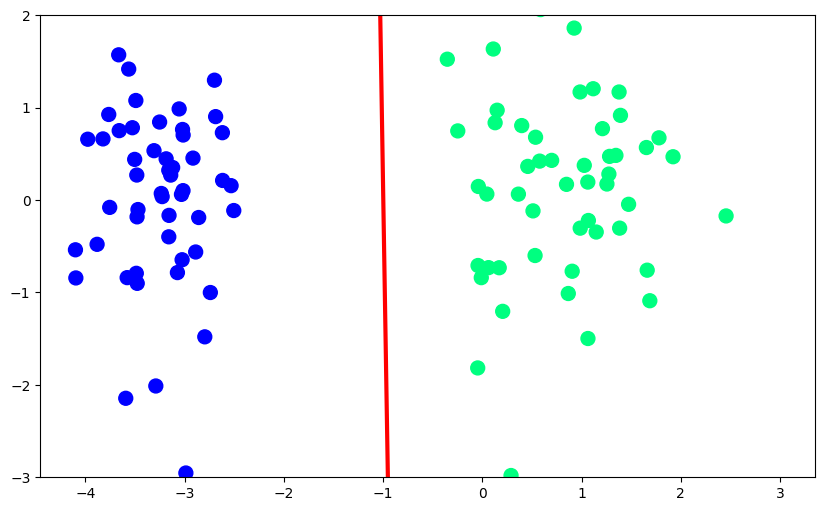

In [11]:
plt.figure(figsize=(10,6))
plot(X,y,m,c)
plt.show()

# Animation

In [14]:
def perceptronAnimation(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [15]:
m_arr,b_arr = perceptronAnimation(X,y)

In [16]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

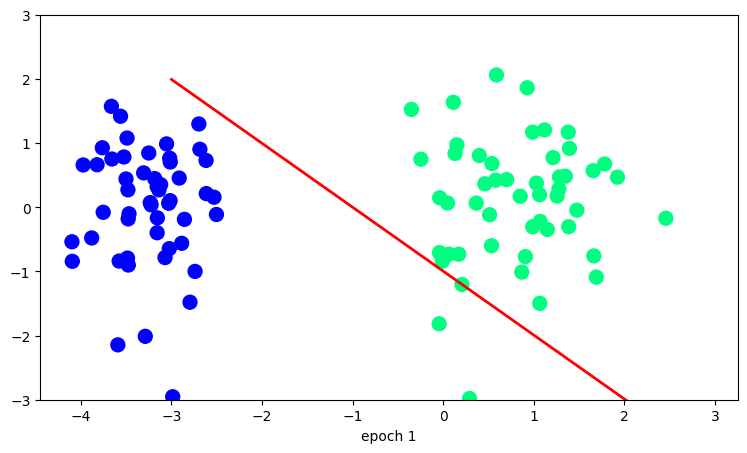

In [18]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m_arr[0] +b_arr[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m_arr[0] +b_arr[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m_arr[i] + b_arr[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)
f = r"animationSigmoid.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)

# Logistic Regression Class

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
log = LogisticRegression()
log.fit(X,y)

LogisticRegression()

In [22]:
m_log = -(log.coef_[0][0]/log.coef_[0][1])
c_log = -(log.intercept_/log.coef_[0][1])

In [23]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m_log*x_input1 + c_log

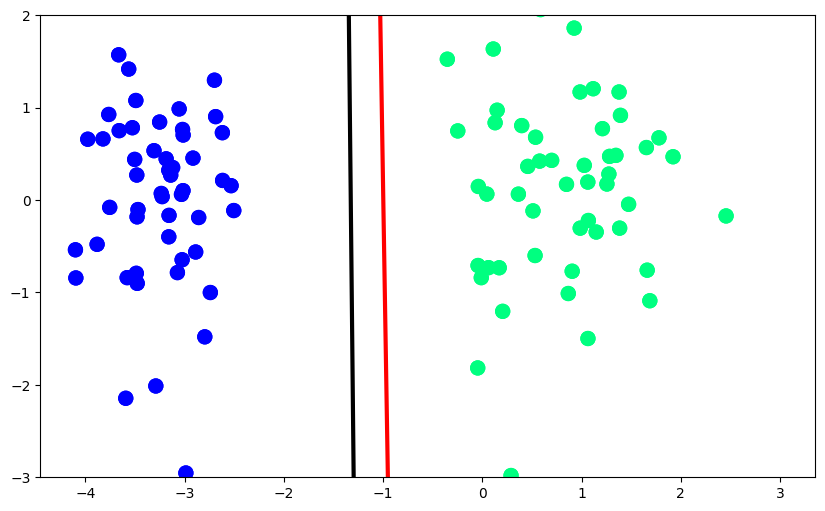

In [25]:
plt.figure(figsize=(10,6))
plot(X,y,m_log,c_log,color='black')
plot(X,y,m,c,color='r')